# Impoting libraries

In [1]:
import scipy

In [2]:
import nibabel as nib
import numpy as np
from nilearn import image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import image as sk_image

In [3]:
nifti_path = 'fmri_X_1018959_session_1_run1.nii'
img = nib.load(nifti_path)
data = img.get_fdata()

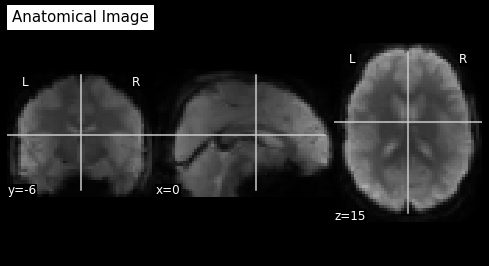

In [4]:
from nilearn import image, plotting
anat_img_path = 'fmri_X_1018959_session_1_run1.nii'
anat_img = nib.load(anat_img_path)

x_cut, y_cut, z_cut = 0, -6, 15
anat_img_3d = image.index_img(anat_img, 0)

anat_img_3d = image.mean_img(anat_img)

plotting.plot_anat(anat_img_3d, title='Anatomical Image', cut_coords=(x_cut, y_cut, z_cut))

# Display the plots
plotting.show()

In [5]:
roi_coords_1 = [(0, -6, 15), (15, 30, 15)] 
roi_mask_1 = np.zeros(data.shape[:-1], dtype=bool)
for coord in roi_coords_1:
    roi_mask_1[coord] = True

In [6]:
roi_coords_2 = [(27, -6, 15), (12, 9, 15)]  
roi_mask_2 = np.zeros(data.shape[:-1], dtype=bool)
for coord in roi_coords_2:
    roi_mask_2[coord] = True

In [7]:
idx_1 = np.array(roi_coords_1).T
idx_2 = np.array(roi_coords_2).T

# Step 3: Extract features from ROIs
roi_data_1 = data[idx_1[0], idx_1[1], idx_1[2], :]
roi_data_2 = data[idx_2[0], idx_2[1], idx_2[2], :]

# Example feature extraction: Mean intensity values
mean_intensity_roi_1 = np.mean(roi_data_1, axis=0)
mean_intensity_roi_2 = np.mean(roi_data_2, axis=0)

In [8]:
X = np.vstack([mean_intensity_roi_1, mean_intensity_roi_2]).T

In [9]:
labels = np.array([0] * roi_data_1.shape[-1] + [1] * roi_data_2.shape[-1])

In [10]:
labels = np.array([0] * (X.shape[0] // 2) + [1] * (X.shape[0] // 2))

# Verify the shape of labels after this adjustment
print("Adjusted labels shape:", labels.shape)

Adjusted labels shape: (152,)


In [11]:
print("X shape:", X.shape)
print("labels shape:", labels.shape)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

X shape: (152, 2)
labels shape: (152,)


# Support Vector Classifier

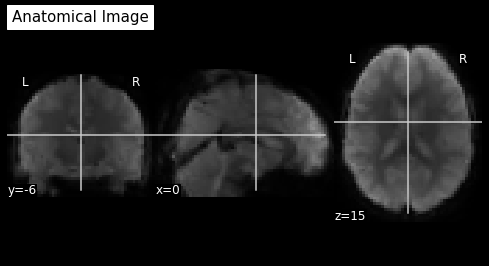

Adjusted labels shape: (124,)
Adjusted labels shape: (124,)
X shape: (124, 2)
labels shape: (124,)
Accuracy: 0.52


In [14]:
nifti_path = 'fmri_X_1652369_session_1_run1.nii'
img = nib.load(nifti_path)
data = img.get_fdata()

from nilearn import image, plotting
anat_img_path = 'fmri_X_1652369_session_1_run1.nii'
anat_img = nib.load(anat_img_path)

x_cut, y_cut, z_cut = 0, -6, 15  # Replace with the desired coordinates
anat_img_3d = image.index_img(anat_img, 0)

anat_img_3d = image.mean_img(anat_img)

plotting.plot_anat(anat_img_3d, title='Anatomical Image', cut_coords=(x_cut, y_cut, z_cut))

# Display the plots
plotting.show()

roi_coords_1 = [(-42, 57, 15), (45, 54, 15)] 
roi_mask_1 = np.zeros(data.shape[:-1], dtype=bool)
for coord in roi_coords_1:
    roi_mask_1[coord] = True
roi_coords_2 = [(-45, 54, 15), (12, 9, 15)]  
roi_mask_2 = np.zeros(data.shape[:-1], dtype=bool)
for coord in roi_coords_2:
    roi_mask_2[coord] = True
    
idx_1 = np.array(roi_coords_1).T
idx_2 = np.array(roi_coords_2).T

# Step 3: Extract features from ROIs
roi_data_1 = data[idx_1[0], idx_1[1], idx_1[2], :]
roi_data_2 = data[idx_2[0], idx_2[1], idx_2[2], :]

# Example feature extraction: Mean intensity values
mean_intensity_roi_1 = np.mean(roi_data_1, axis=0)
mean_intensity_roi_2 = np.mean(roi_data_2, axis=0)

X = np.vstack([mean_intensity_roi_1, mean_intensity_roi_2]).T
labels = np.array([0] * roi_data_1.shape[-1] + [1] * roi_data_2.shape[-1])
labels = np.array([0] * (X.shape[0] // 2) + [1] * (X.shape[0] // 2))

# Verify the shape of labels after this adjustment
print("Adjusted labels shape:", labels.shape)
labels = np.array([0] * (X.shape[0] // 2) + [1] * (X.shape[0] // 2))

# Verify the shape of labels after this adjustment
print("Adjusted labels shape:", labels.shape)

print("X shape:", X.shape)
print("labels shape:", labels.shape)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Conv1D, Conv3D, MaxPooling1D, LSTM, concatenate

# Deep Neural Networks

In [16]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1:])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the DNN model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/100
4/4 [==============================] - 3s 159ms/step - loss: 0.6663 - accuracy: 0.5960 - val_loss: 0.6280 - val_accuracy: 0.6400
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6482 - accuracy: 0.6465 - val_loss: 0.6066 - val_accuracy: 0.7200
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6320 - accuracy: 0.6768 - val_loss: 0.5887 - val_accuracy: 0.7600
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6160 - accuracy: 0.6768 - val_loss: 0.5712 - val_accuracy: 0.8000
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6019 - accuracy: 0.7071 - val_loss: 0.5533 - val_accuracy: 0.8400
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5872 - accuracy: 0.7273 - val_loss: 0.5364 - val_accuracy: 0.8400
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5737 - accuracy: 0.7374 - val_loss: 0.5207 - val_accuracy: 0.8400
Epoch 8/100
4/4 [==

In [17]:
# Reshape the data for CNN (assuming you have 3D data)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
# Build a simple CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Conv1D(64, kernel_size=1, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

In [19]:
print(X_train_cnn.shape)

(99, 2, 1)


# Convolutional Neural Networks

In [44]:
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the CNN model
model_cnn.fit(X_train_cnn, y_train, epochs=40, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# Evaluate the CNN model
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy (CNN): {test_accuracy_cnn}")

Epoch 1/40
4/4 [==============================] - 3s 237ms/step - loss: 0.3464 - accuracy: 0.8485 - val_loss: 0.1953 - val_accuracy: 0.9600
Epoch 2/40
4/4 [==============================] - 0s 82ms/step - loss: 0.3418 - accuracy: 0.8485 - val_loss: 0.1964 - val_accuracy: 0.9600
Epoch 3/40
4/4 [==============================] - 0s 59ms/step - loss: 0.3406 - accuracy: 0.8283 - val_loss: 0.1978 - val_accuracy: 0.9600
Epoch 4/40
1/1 [==============================] - 0s 28ms/step - loss: 0.1953 - accuracy: 0.9600
Test Accuracy (CNN): 0.9599999785423279


# Hybrid Architecture

In [33]:
# Define the CNN model for spatial feature extraction
cnn_input = Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))
cnn_layer1 = Conv1D(32, kernel_size=1, activation='relu')(cnn_input)
cnn_layer2 = MaxPooling1D(pool_size=1)(cnn_layer1)
cnn_flatten = Flatten()(cnn_layer2)

# Define the RNN model for temporal modeling
rnn_input = Input(shape=(X_train.shape[1], 1))
rnn_layer1 = LSTM(64, return_sequences=True)(rnn_input)
rnn_layer2 = LSTM(64)(rnn_layer1)

# Concatenate the output of CNN and RNN layers
merged = concatenate([cnn_flatten, rnn_layer2])

# Add fully connected layers for classification
dense1 = Dense(64, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(dense1)

# Define the hybrid model
model_hybrid = Model(inputs=[cnn_input, rnn_input], outputs=output)

# Compile the model
model_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_hybrid.fit([X_train_cnn, X_train], y_train, epochs=10, batch_size=32, validation_data=([X_test_cnn, X_test], y_test))

Epoch 1/10
4/4 [==============================] - 12s 480ms/step - loss: 0.6578 - accuracy: 0.6364 - val_loss: 0.6229 - val_accuracy: 0.8400
Epoch 2/10
4/4 [==============================] - 0s 46ms/step - loss: 0.6077 - accuracy: 0.8081 - val_loss: 0.5708 - val_accuracy: 0.8800
Epoch 3/10
4/4 [==============================] - 0s 46ms/step - loss: 0.5668 - accuracy: 0.8081 - val_loss: 0.5267 - val_accuracy: 0.8400
Epoch 4/10
4/4 [==============================] - 0s 47ms/step - loss: 0.5301 - accuracy: 0.8081 - val_loss: 0.4850 - val_accuracy: 0.8400
Epoch 5/10
4/4 [==============================] - 0s 48ms/step - loss: 0.4991 - accuracy: 0.7980 - val_loss: 0.4460 - val_accuracy: 0.8800
Epoch 6/10
4/4 [==============================] - 0s 43ms/step - loss: 0.4705 - accuracy: 0.7980 - val_loss: 0.4104 - val_accuracy: 0.8800
Epoch 7/10
4/4 [==============================] - 0s 45ms/step - loss: 0.4447 - accuracy: 0.8081 - val_loss: 0.3788 - val_accuracy: 0.8800
Epoch 8/10
4/4 [=========

In [37]:
# Evaluate the model on test data
loss, accuracy = model_hybrid.evaluate([X_test_cnn, X_test[..., np.newaxis]], y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1/1 [==============================] - 0s 34ms/step - loss: 0.3007 - accuracy: 0.9600
Test Loss: 0.30074307322502136, Test Accuracy: 0.9599999785423279
